In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [2]:
from statsmodels.datasets.sunspots import load_pandas

df = load_pandas().data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    float64
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


In [3]:
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [4]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

In [5]:
df.index = df['YEAR']

In [6]:
del df['YEAR']

In [7]:
df.shape

(309, 1)

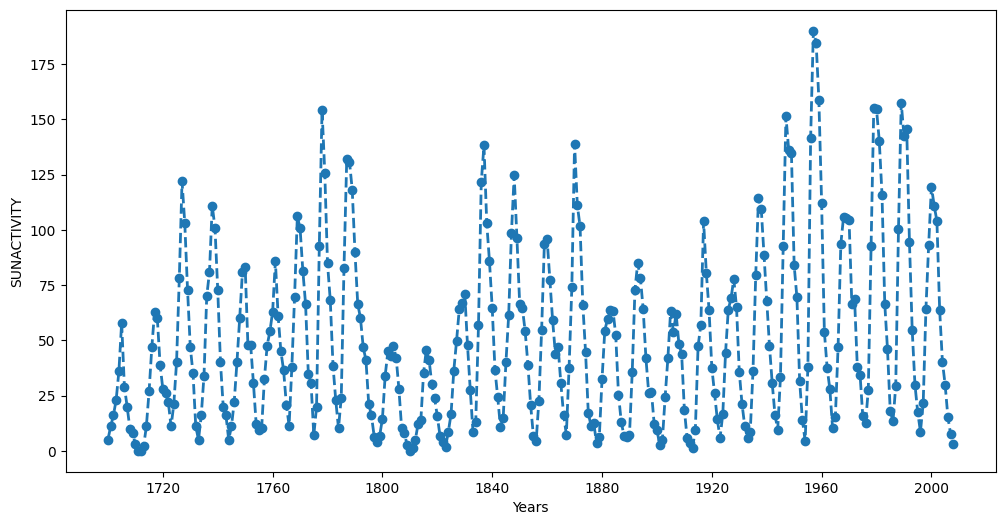

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df, linestyle='--', marker='o', linewidth=2)
plt.xlabel('Years')
plt.ylabel('SUNACTIVITY')
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss
from typing import Union

def stat(data: Union[pd.DataFrame, pd.Series, np.array]) -> None:

    result = adfuller(data)
    t_stat = result[0]
    p_value = result[1]
    t_critical = result[4]
    print('-' * 50)
    print(f'Adfuller test:\n{t_stat=}\n{t_critical=}\n{p_value=}')
    print('-' * 50)
    if p_value < 0.05:
        print('Adfuller test -> Not Stationary')
    else:
        print('Adfuller test -> Stationary')

    print('-' * 50)
    result_kpss = kpss(data)
    print(f'KPSS test:\nT-statistic{result_kpss[0]}\nT-critical{result_kpss[3]}\np_value {result_kpss[1]}')
    print('-' * 50)
    if result_kpss[1] < 0.05:
        print('KPSS test -> Stationary')
    else:
        print('KPSS test -> not Stationary')

In [10]:
stat(df['SUNACTIVITY'])

--------------------------------------------------
Adfuller test:
t_stat=-2.8377807249381966
t_critical={'1%': -3.4523371197407404, '5%': -2.871222860740741, '10%': -2.571929211111111}
p_value=0.05307642172812041
--------------------------------------------------
Adfuller test -> Stationary
--------------------------------------------------
KPSS test:
T-statistic0.6698662984667937
T-critical{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
p_value 0.01628488195756421
--------------------------------------------------
KPSS test -> Stationary


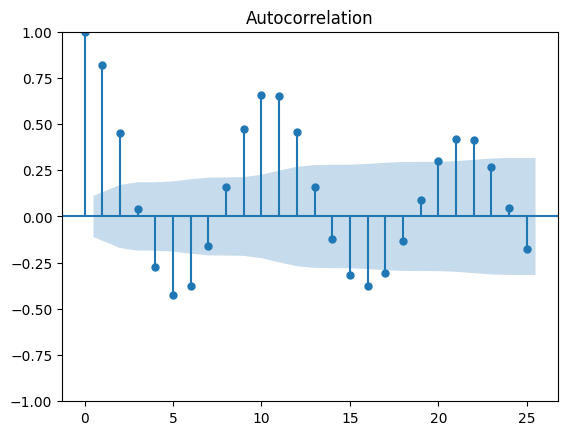

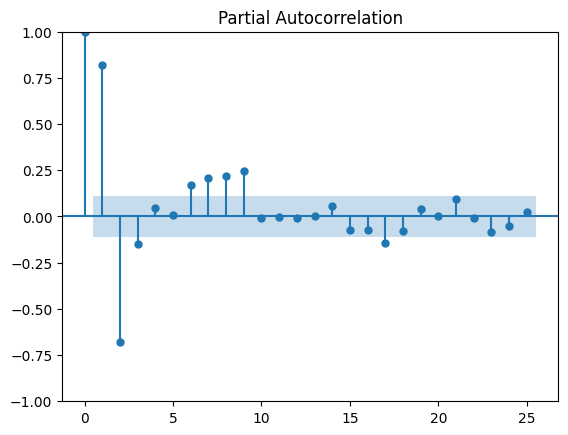

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plot_pacf(df)

plt.show()

In [12]:
from itertools import product
import warnings
warnings.filterwarnings('ignore')

p = d = q = range(0, 3)
pdq = list(product(p, d, q))

In [13]:
########## ARIMA MODEL

best_aic = float('inf')
best_bic = float('inf')
best_order = None

for param in pdq:
    try:
        model_ARIMA = ARIMA(df['SUNACTIVITY'], order=param)
        result_ARIMA = model_ARIMA.fit()

        aic = result_ARIMA.aic
        bic = result_ARIMA.bic

        if best_aic > aic:
            best_aic = aic
            best_order = param
        if best_bic > bic:
            best_bic = bic
        print(f'{param=}')
    except:
        continue
        
print(f"{best_aic=}\n{best_bic}\n{best_order=}")

param=(0, 0, 0)
param=(0, 0, 1)
param=(0, 0, 2)
param=(0, 1, 0)
param=(0, 1, 1)
param=(0, 1, 2)
param=(0, 2, 0)
param=(0, 2, 1)
param=(0, 2, 2)
param=(1, 0, 0)
param=(1, 0, 1)
param=(1, 0, 2)
param=(1, 1, 0)
param=(1, 1, 1)
param=(1, 1, 2)
param=(1, 2, 0)
param=(1, 2, 1)
param=(1, 2, 2)
param=(2, 0, 0)
param=(2, 0, 1)
param=(2, 0, 2)
param=(2, 1, 0)
param=(2, 1, 1)
param=(2, 1, 2)
param=(2, 2, 0)
param=(2, 2, 1)
param=(2, 2, 2)
best_aic=2576.325901537718
2594.976400452586
best_order=(2, 1, 2)


In [14]:
model_ARIMA_ = ARIMA(df['SUNACTIVITY'], order=(2, 1, 2))
result_ARIMA_ = model_ARIMA_.fit()

In [15]:
print(result_ARIMA_.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1283.163
Date:                Sun, 06 Apr 2025   AIC                           2576.326
Time:                        20:25:29   BIC                           2594.976
Sample:                    01-01-1700   HQIC                          2583.783
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6098      0.026     61.536      0.000       1.559       1.661
ar.L2         -0.9381      0.023    -41.582      0.000      -0.982      -0.894
ma.L1         -1.5185      0.055    -27.634      0.0

In [53]:
##### 21 years 

predict_arima = result_ARIMA_.predict(start='2008-01-01', end='2030-01-01')

In [54]:
forecast_arima = result_ARIMA_.get_forecast(steps=22)

In [55]:
arima_mean = forecast_arima.predicted_mean

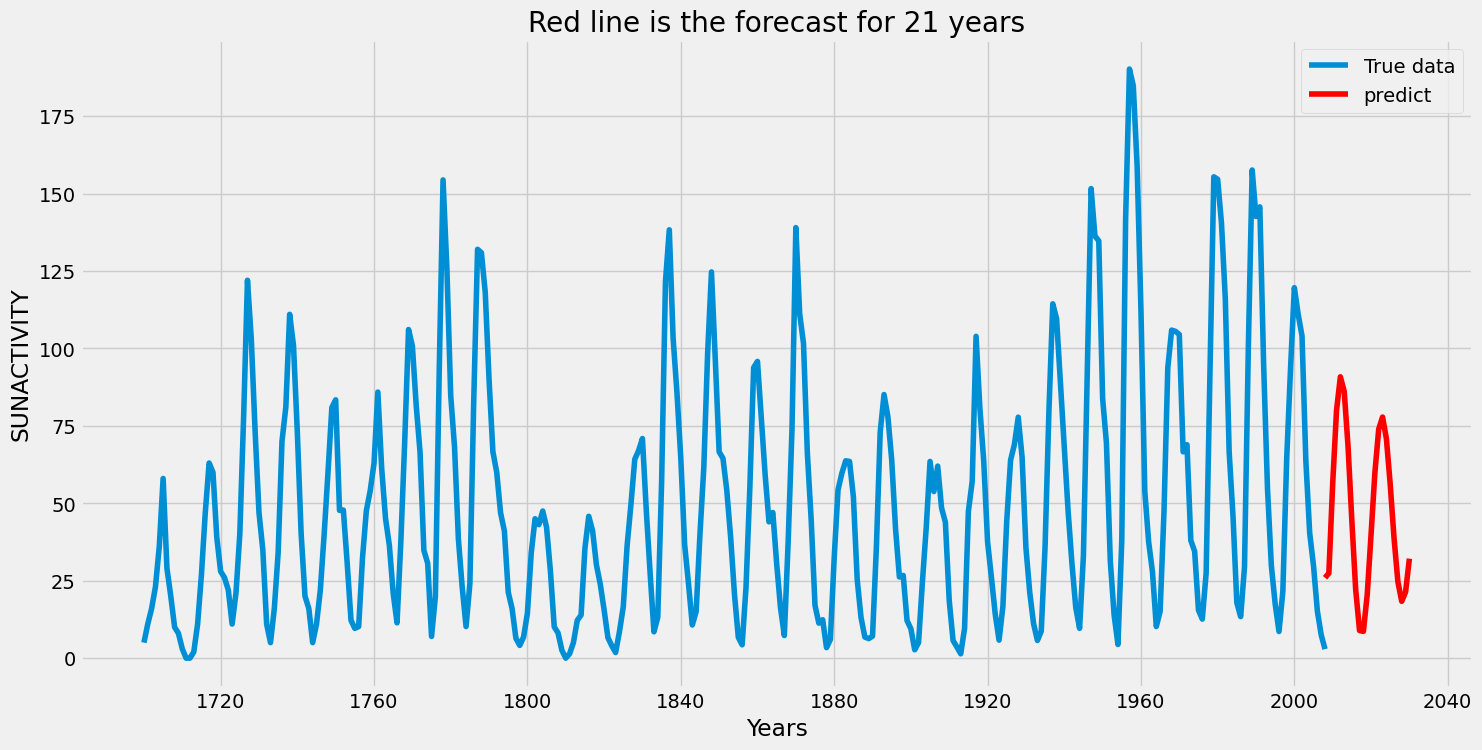

In [60]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 8))
plt.plot(df, label='True data')
plt.plot(predict_arima, c='r', label='predict')
plt.title('Red line is the forecast for 21 years')
plt.xlabel('Years')
plt.ylabel('SUNACTIVITY')
plt.legend()
plt.show()

In [61]:
####################################################################################################################

In [62]:
p = d = q = range(0, 3)

pdq = list(product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))] 

In [63]:
############# SARIMAX model


best_aic = float('inf')
best_param = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df["SUNACTIVITY"], 
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False,)
            results = mod.fit()

            aic = results.aic
            if best_aic > aic:
                best_aic = aic
                best_param = (param, param_seasonal)
                
            print(f' param pdq -> {param} PDQ S -> {param_seasonal} aic -> {results.aic}')
        except:
            continue
print(f'best parametrs {best_param}')

 param pdq -> (0, 0, 0) PDQ S -> (0, 0, 0, 12) aic -> 3439.710598624912
 param pdq -> (0, 0, 0) PDQ S -> (0, 0, 1, 12) aic -> 3155.618267417887
 param pdq -> (0, 0, 0) PDQ S -> (0, 0, 2, 12) aic -> 2945.2199371171178
 param pdq -> (0, 0, 0) PDQ S -> (0, 1, 0, 12) aic -> 3049.1506172991085
 param pdq -> (0, 0, 0) PDQ S -> (0, 1, 1, 12) aic -> 2931.5259900073206
 param pdq -> (0, 0, 0) PDQ S -> (0, 1, 2, 12) aic -> 2759.225043391218
 param pdq -> (0, 0, 0) PDQ S -> (0, 2, 0, 12) aic -> 3160.4309475954406
 param pdq -> (0, 0, 0) PDQ S -> (0, 2, 1, 12) aic -> 2848.680386795547
 param pdq -> (0, 0, 0) PDQ S -> (0, 2, 2, 12) aic -> 2725.6888470043014
 param pdq -> (0, 0, 0) PDQ S -> (1, 0, 0, 12) aic -> 3033.780146812068
 param pdq -> (0, 0, 0) PDQ S -> (1, 0, 1, 12) aic -> 3026.479861647011
 param pdq -> (0, 0, 0) PDQ S -> (1, 0, 2, 12) aic -> 2883.387632654512
 param pdq -> (0, 0, 0) PDQ S -> (1, 1, 0, 12) aic -> 2942.7951482313892
 param pdq -> (0, 0, 0) PDQ S -> (1, 1, 1, 12) aic -> 2886

In [64]:
model_SARIMAX = SARIMAX(df['SUNACTIVITY'], order=(2, 1, 2), seasonal_order=(0, 2, 2, 12))
result_SARIMAX = model_SARIMAX.fit()

In [65]:
predict_SARIMAX = result_SARIMAX.predict(start='2008-01-01', end='2030-01-01')

In [66]:
print(result_SARIMAX.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(2, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -1248.718
Date:                            Sun, 06 Apr 2025   AIC                           2511.437
Time:                                    21:01:25   BIC                           2536.979
Sample:                                01-01-1700   HQIC                          2521.677
                                     - 01-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6093      0.027     59.416      0.000       1.556       1.662
ar.L2         -0.9350      0.022   

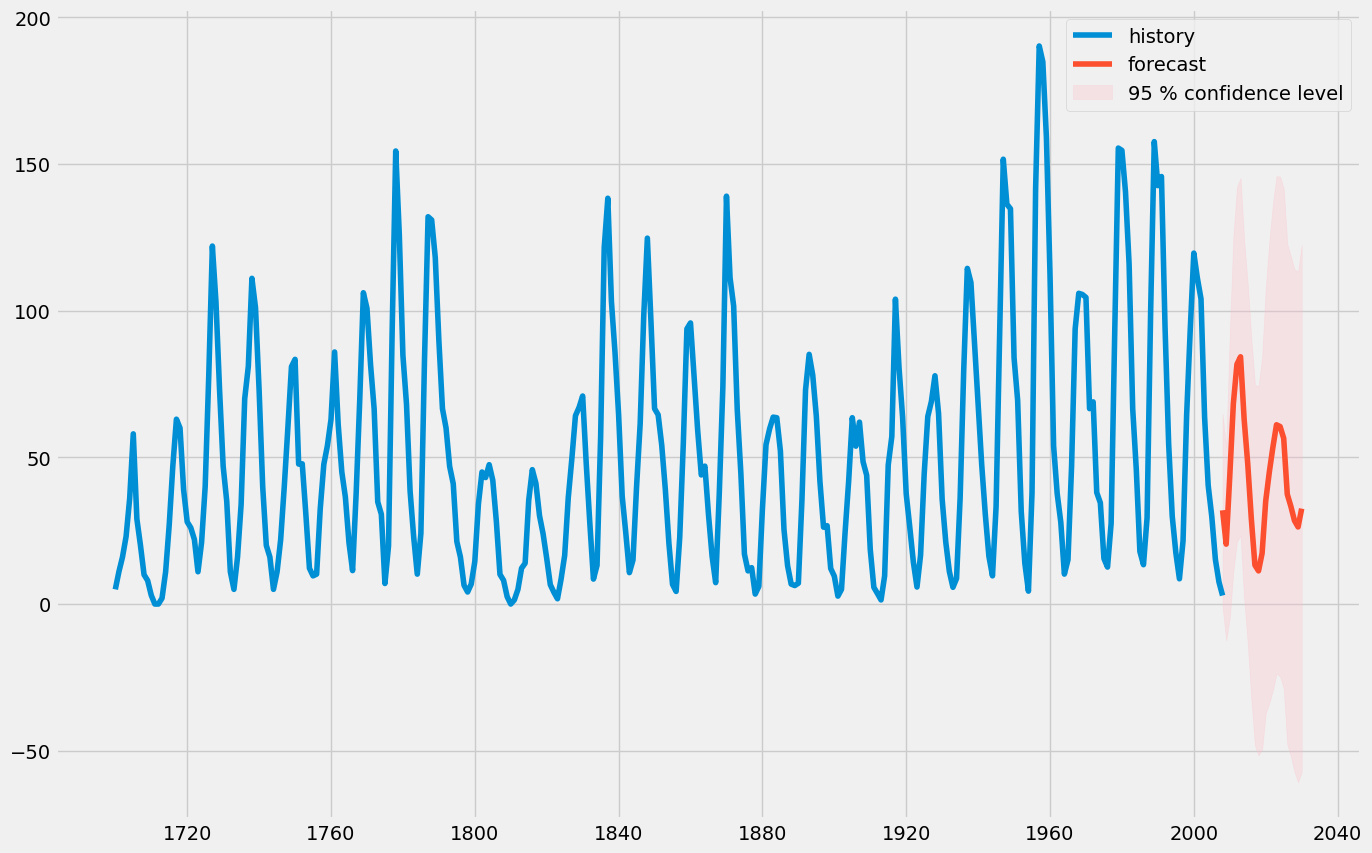

In [68]:
get_predict_sarimax = result_SARIMAX.get_prediction(start='2008-01-01', end='2030-01-01')

mean_forecast = get_predict_sarimax.predicted_mean
conf_int = get_predict_sarimax.conf_int()

plt.figure(figsize=(15, 10))
plt.plot(df, label='history')
plt.plot(mean_forecast, label='forecast')
plt.fill_between(conf_int.index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1], color='pink',
                 alpha=0.3, label='95 % confidence level')
plt.legend()
plt.show()

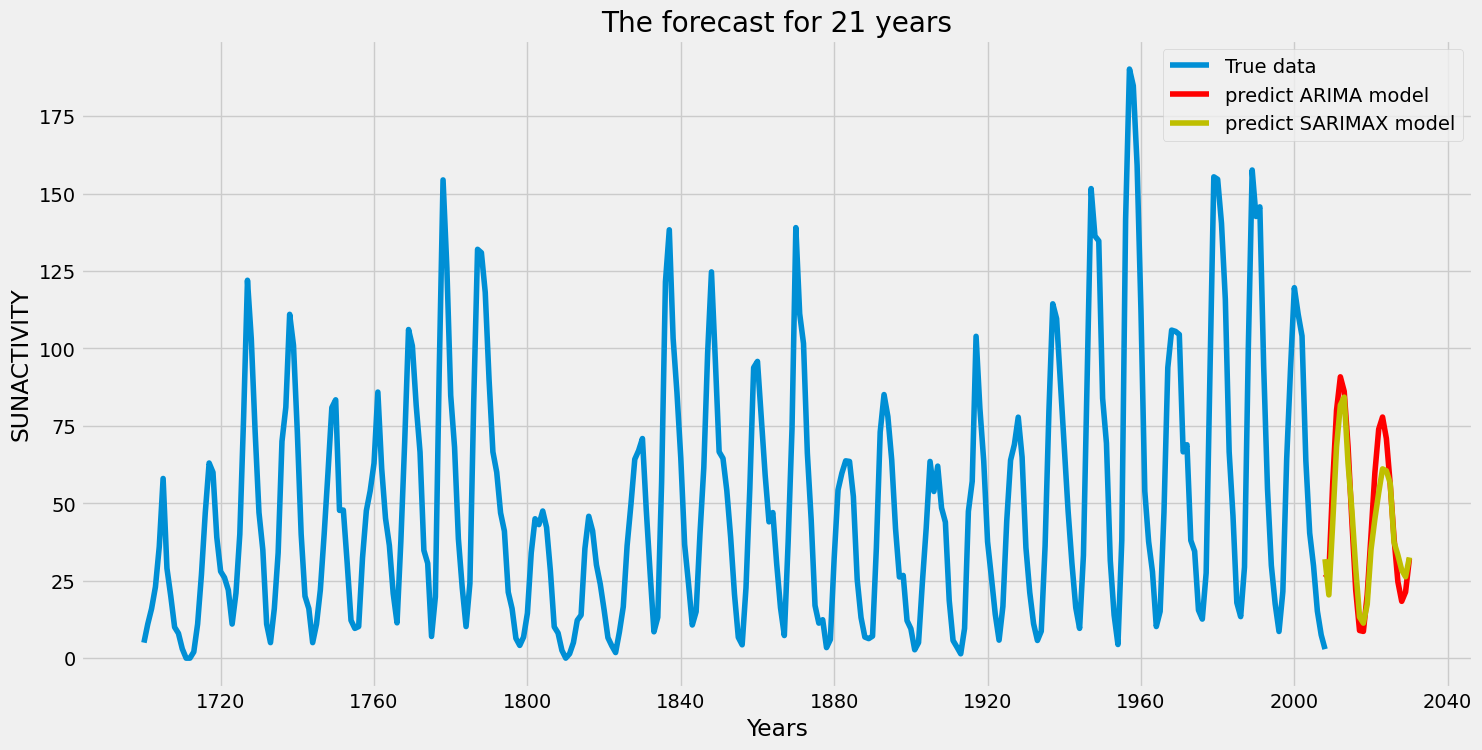

In [69]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 8))
plt.plot(df, label='True data')
plt.plot(predict_arima, c='r', label='predict ARIMA model')
plt.plot(predict_SARIMAX, c='y', label='predict SARIMAX model')
plt.title('The forecast for 21 years')
plt.xlabel('Years')
plt.ylabel('SUNACTIVITY')
plt.legend()
plt.show()

In [70]:
##########################################################################
#
#
# AUTO ARIMA

model_auto = auto_arima(df['SUNACTIVITY'], trace=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2578.271, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.116, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2730.690, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2743.278, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.116, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2611.999, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2575.206, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2597.162, Time=0.31 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2578.505, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2574.924, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2576.690, Time=0.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, T

In [71]:
predict_auto = model_auto.predict(n_periods=21)

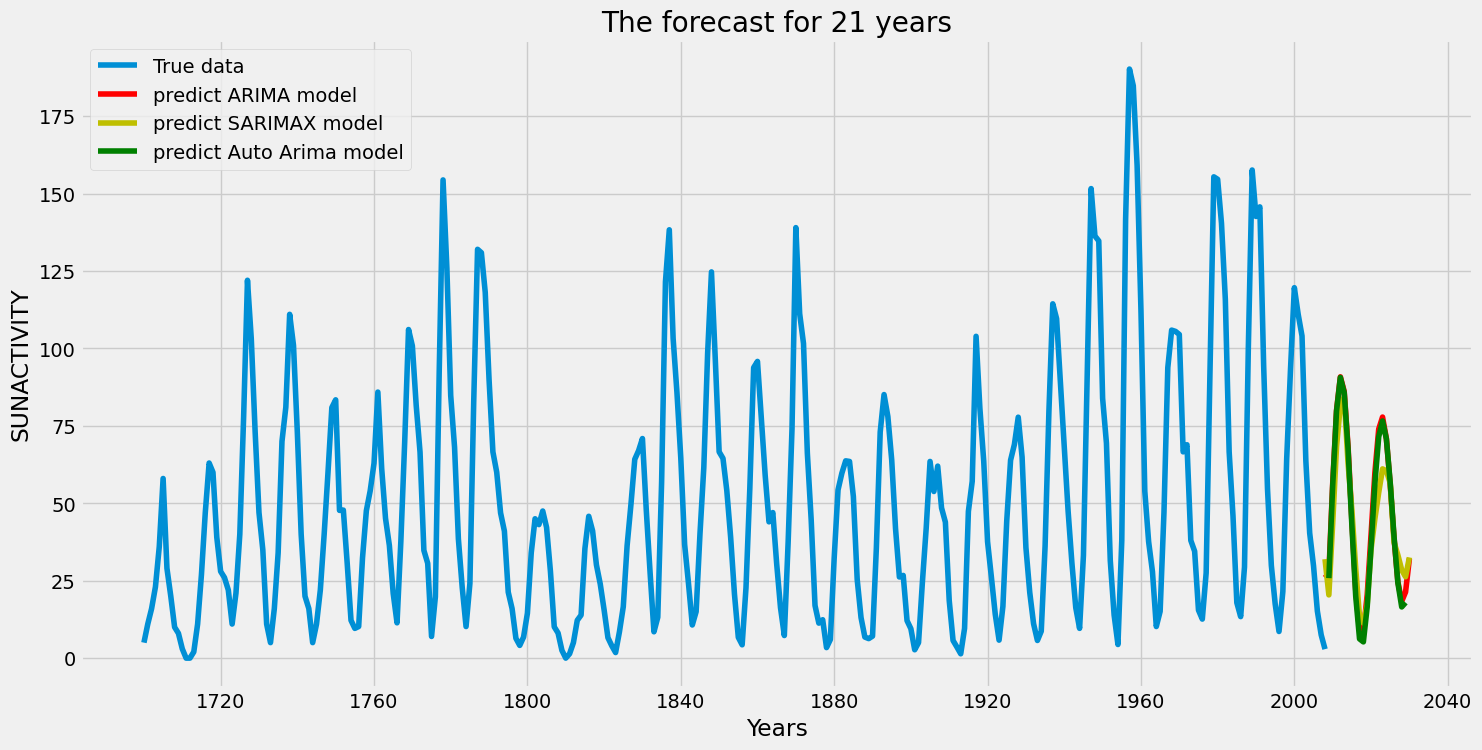

In [72]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 8))
plt.plot(df, label='True data')
plt.plot(predict_arima, c='r', label='predict ARIMA model')
plt.plot(predict_SARIMAX, c='y', label='predict SARIMAX model')
plt.plot(predict_auto, c='green', label='predict Auto Arima model')
plt.title('The forecast for 21 years')
plt.xlabel('Years')
plt.ylabel('SUNACTIVITY')
plt.legend()
plt.show()

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [74]:
result = seasonal_decompose(df, model='add', period=12)
residuals = result.resid.dropna()

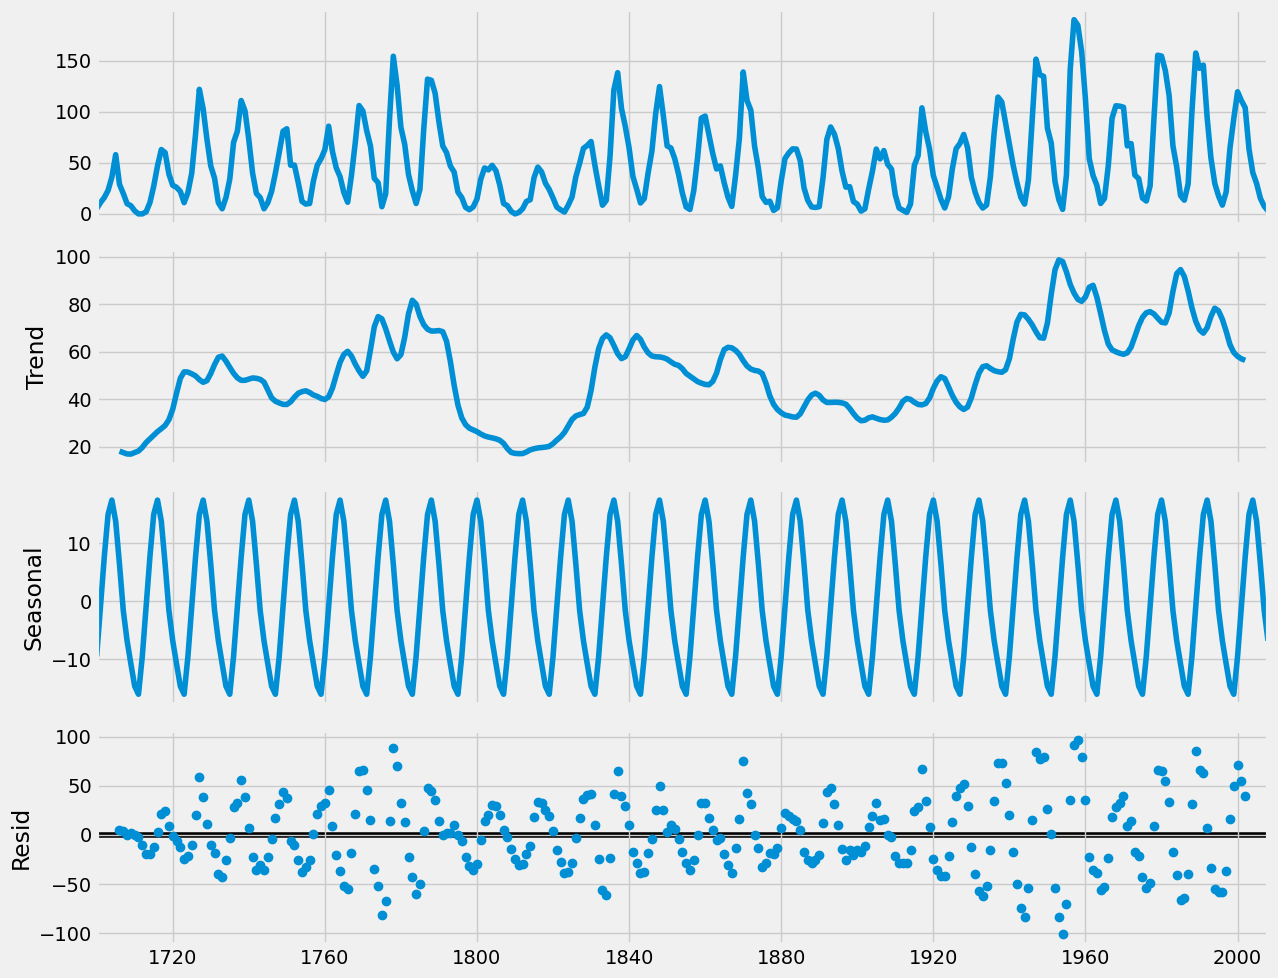

In [75]:
plt.rcParams.update({'figure.figsize': (13, 10)})
result.plot()
plt.show()

In [76]:
mean = residuals.mean()
std = residuals.std()

print(f'{mean = :.3f}')
print(f'{std = :.3f}')

mean = 0.389
std = 37.252


In [81]:
anomalies = residuals[(residuals > mean + 2 * std) | (residuals < mean - 2 * std)]

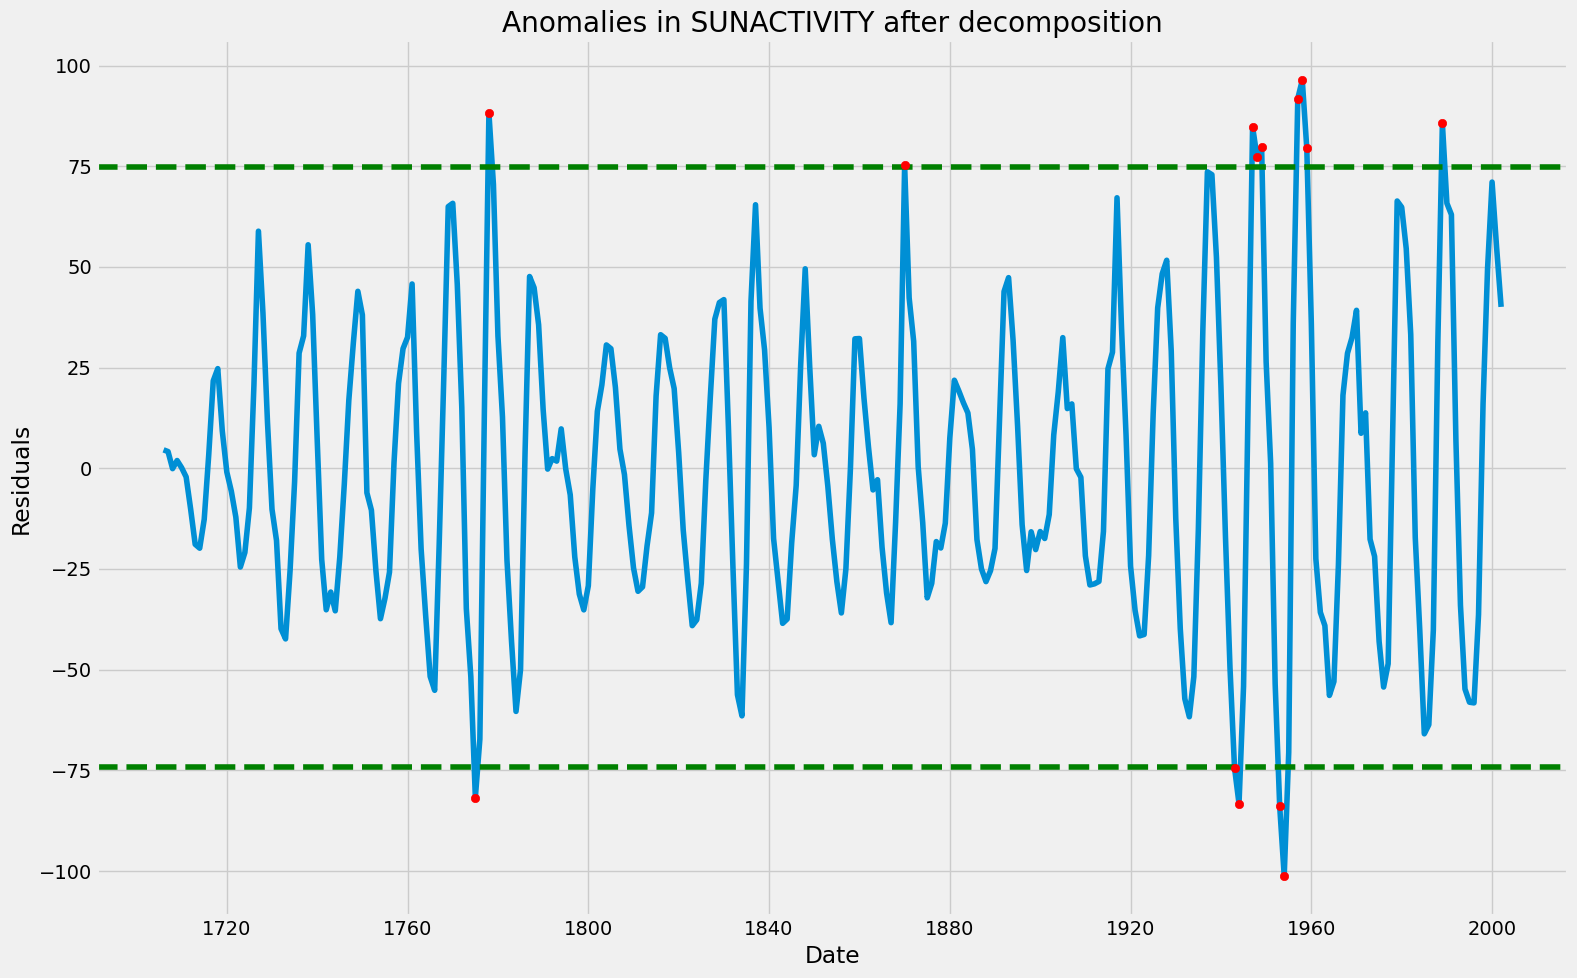

In [86]:
plt.figure(figsize=(16, 10))
plt.plot(residuals, label='residual')
plt.scatter(anomalies.index, anomalies.values, c='r', label='Anomalies', zorder=3)
plt.axhline(mean + 2 * std, c='g', linestyle='--', label='+- 2 std')
plt.axhline(mean - 2 * std, c='g', linestyle='--', label='+- 2 std')
plt.title('Anomalies in SUNACTIVITY after decomposition')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()